<a href="https://colab.research.google.com/github/thePairedElectron/CNNModel/blob/master/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.models import Sequential
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *


Using TensorFlow backend.


# Rahul VGG File

In [0]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import numpy as np
import keras as k
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.models import Sequential
from keras.layers.core import Dense,Flatten
from keras.optimizers import adam
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *



#gdrive/My Drive/Colab Notebooks/Dataset
#Dataset_Signature_Final.zip
train_path = 'gdrive/My Drive/Colab Notebooks/Training'
valid_path = 'gdrive/My Drive/Colab Notebooks/Test'
#test_path  = ''

train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['real','forge'],batch_size =1)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['real','forge'],batch_size =1)
#test_batches  = ImageDataGenerator().flow_from_directory(test_path,targe_size=(224,224),classes=['Real','fake'],batch_size = 10)
#train_batches = train_batches/255
#valid_batches = valid_batches/255
#print(next(train_batches))
#imgs,labels = next(train_batches)

vgg16_model = k.applications.vgg16.VGG16(weights = 'imagenet')
#print(vgg16_model.activations)
model = Sequential()
#model.add(Dense(numberOfNeurons, activation='yourActivationFunction', input_dim=inputDimension))
for layer in vgg16_model.layers:
    model.add(layer)


model.layers.pop()
model.add(Dense(2,activation='softmax'))
#vgg16_model.summary()
for layer in vgg16_model.layers:
    layer.trainable = False
adam = Adam(lr = 0.0001)
#model.compile(loss=k.losses.categorical_crossentropy,optimizer = adam,metrics=['accuracy'])
#model.fit_generator(train_batches,steps_per_epoch =5 ,validation_data= valid_batches,validation_steps = 2,epochs = 10 , verbose = 2)
#model.save('gdrive/My Drive/Colab Notebooks/signature_model1.h5')
#model.get_config()
model.count_params()
print(next(train_batches))


Found 567 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


138359546

# **Preprocessing**

In [0]:
#from sklearn.filters import threshold_otsu
import cv2
def preprocessing(image):
#   cv2.imshow("pre",image)
#  print("Hi")
  img = cv.GaussianBlur(image,(5,5),0)
  ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  th2 = cv2.bitwise_not(th2)
#   cv2.imshow("post",image)
  return th2;
# img = cv2.imread('gdrive/My Drive/Colab Notebooks/User1/real/00600006.png',0)
# cv2.imshow("pre",img)
#preprocessing(img)
#train_path = 'gdrive/My Drive/Colab Notebooks/User1'
#train_batches = ImageDataGenerator(preprocessing_function =  preprocessing).flow_from_directory(train_path,target_size=(224,224),classes=['real','forge'],batch_size =32)


  

# Rahul VGG impl

In [0]:

import numpy as np
import keras as k
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.models import Sequential
from keras.layers.core import Dense,Flatten
from keras.optimizers import adam
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import optimizers

train_path = 'gdrive/My Drive/Colab Notebooks/Training'
valid_path = 'gdrive/My Drive/Colab Notebooks/Test'
#test_path  = ''

train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),color_mode = 'rgb',classes=['real','forge'],batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),color_mode = 'rgb',classes=['real','forge'],batch_size = 10)
#test_batches  = ImageDataGenerator().flow_from_directory(test_path,targe_size=(224,224),classes=['Real','fake'],batch_size = 10)

input_shape = (224, 224, 3)

model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2),),
    Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2),),
    Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2),),
    Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2),),
    Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2),),
    Flatten(),
    Dense(4096, activation='relu',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    Dense(4096, activation='relu',kernel_initializer = 'random_uniform',bias_initializer = 'zero'),
    Dense(2, activation='softmax')
])

#model.layers.pop()
#model.add(Dense(2,activation='softmax'))
gd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr = 0.0001)
model.compile(loss=k.losses.categorical_crossentropy,optimizer = gd,metrics=['accuracy'])
model.fit_generator(train_batches,steps_per_epoch =56 ,validation_data= valid_batches,validation_steps = 16,epochs = 10 , verbose = 2)

Found 567 images belonging to 2 classes.
Found 164 images belonging to 2 classes.
Epoch 1/10
 - 189s - loss: 7.8229 - acc: 0.5143 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
 - 30s - loss: 8.0507 - acc: 0.5005 - val_loss: 8.2684 - val_acc: 0.4870
Epoch 3/10
 - 27s - loss: 8.0795 - acc: 0.4987 - val_loss: 7.6404 - val_acc: 0.5260
Epoch 4/10
 - 27s - loss: 8.0553 - acc: 0.5002 - val_loss: 8.7917 - val_acc: 0.4545
Epoch 5/10
 - 27s - loss: 7.9235 - acc: 0.5084 - val_loss: 7.7451 - val_acc: 0.5195
Epoch 6/10
 - 27s - loss: 7.9522 - acc: 0.5066 - val_loss: 7.7451 - val_acc: 0.5195
Epoch 7/10
 - 27s - loss: 8.0144 - acc: 0.5028 - val_loss: 8.1637 - val_acc: 0.4935
Epoch 8/10
 - 27s - loss: 8.0507 - acc: 0.5005 - val_loss: 7.7451 - val_acc: 0.5195
Epoch 9/10
 - 27s - loss: 7.8492 - acc: 0.5130 - val_loss: 8.6870 - val_acc: 0.4610
Epoch 10/10
 - 27s - loss: 8.1492 - acc: 0.4944 - val_loss: 8.0590 - val_acc: 0.5000


In [0]:
vgg16.summary()

# Google drive mount

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from google

# Nisarg VGG File

In [0]:
import numpy as np
import keras as k
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.models import Sequential
from keras.layers.core import Dense,Flatten
from keras.optimizers import adam
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *



#gdrive/My Drive/Colab Notebooks/Dataset
#Dataset_Signature_Final.zip
train_path ='gdrive/My Drive/Colab Notebooks/Dataset/dataset1'
valid_path = 'gdrive/My Drive/Colab Notebooks/Dataset/dataset1'
#test_path  = ''
batch_size = 4


train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path,target_size=(224,224),classes=['real','forge'],batch_size = 16)
valid_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_path,target_size=(224,224),classes=['real','forge'],batch_size = 8)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_path,target_size=(224,224),classes=['real','forge'],batch_size = 4)


#print(next(train_batches))
# def pop_layer(model):
#     if not model.outputs:
#         raise Exception('Sequential model cannot be popped: model is empty.')

#     model.layers.pop()
#     if not model.layers:
#         model.outputs = []
#         model.inbound_nodes = []
#         model.outbound_nodes = []
#     else:
#         model.layers[-1].outbound_nodes = []
#         model.outputs = [model.layers[-1].output]
#     model.built = False

vgg16_model = k.applications.vgg16.VGG16(weights = 'imagenet',include_top = True)

#model.add(Dense(numberOfNeurons, activation='yourActivationFunction', input_dim=inputDimension))
#model = Sequential()
#for layer in vgg16_model.layers:
#   model.add(layer)

#vgg16_model.summary()
#model.layers.pop()
#vgg = Model(inputs=vgg16_model.get_input_at(0), outputs=vgg16_model.layers[-2].get_output_at(0))

#Add a layer where input is the output of the  second last layer 
x = Dense(2, activation='softmax', name='predictions')(vgg16_model.layers[-2].output)

#Then create the corresponding model 
model = Model(input=vgg16_model.input, output=x)
#model.add(vgg)
#model.add(Flatten(name='flatten'))
#model.add(Dense(4096, activation='relu', name='fc1'))
#model.add(Dense(4096, activation='relu', name='fc2'))
#model.add(Dense(2, activation='softmax', name='predictions'))
#model.add(Dense(2,activation='softmax'))
#model.summary()
for layer in model.layers:
   layer.trainable = False
model.summary() 
model.get_layer('predictions').trainable = True  
model.summary()

adam = Adam(lr = 0.0001)
model.compile(loss=k.losses.categorical_crossentropy,optimizer = adam,metrics=['accuracy'])
history = model.fit_generator(train_batches,steps_per_epoch = 36,validation_data= valid_batches,validation_steps = 20, epochs = 30 , verbose = 1)
#model.save('gdrive/My Drive/Colab Notebooks/signature_model_30epochs.h5')

# data_list = []
# batch_index = 0
# while batch_index <= test_batches.batch_index:
#     data,label = test_batches.next()
#     data_list.append(label[:,0])
#     batch_index = batch_index + 1
# total_num = batch_index * batch_size
# print(total_num)
# prediction = model.predict_generator(test_batches,steps = batch_index,verbose = 0);
# predictions = np.round(prediction[:,0])



# data_array = np.asarray(data_list)
# flat_list = [item for sublist in data_array for item in sublist]

# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# y_test = flat_list
# y_pred = predictions
# cnf_matrix = confusion_matrix(y_test, y_pred)
# class_names = ['real','forge']
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix CNN VGG architecture')


Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
import numpy as np 
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

img = np.expand_dims(ndimage.imread('NN.png'),0)
plt.inshow(img[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


FileNotFoundError: ignored

In [0]:
for layer in model.layers:
    print(layer.name)

input_4
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


In [0]:
top_layer = model.layers[1]
print(top_layer)
print(top_layer.get_weights())
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
          -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
         [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
          -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
         [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
          -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],

        [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
          -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
         [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
          -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
         [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
          -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],

        [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
          -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
         [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
          -9.43124294e-02, -5.056

NameError: ignored

In [0]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize.
filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])

InvalidArgumentError: ignored

In [0]:
import matplotlib.pyplot as plt
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, CNN VGG architecture')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 4.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# ***Visualizing Nisarg_CNN LOSS***




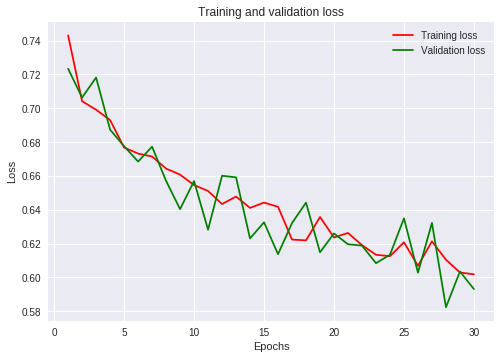

In [0]:

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [0]:
from keras.utils import plot_model
plot_model(model, to_file='gdrive/My Drive/Colab Notebooks/visualize_model.png')


# ***Visualizing Nisarg_CNN Acc ***





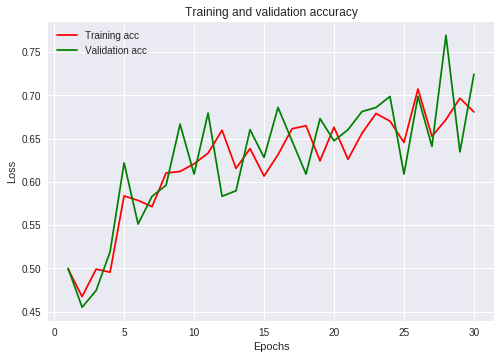

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Visualize Nisarg_CNN Layers**

In [0]:
from keras.models import Model
from keras.models import load_model
from keras.preprocessing import image
import os
import glob

x = []
train_path = 'gdrive/My Drive/Colab Notebooks/User 2'
train_labels = os.listdir(train_path)
for i,label in enumerate(train_labels):
  cur_path = train_path + "/" + label
  count = 1
  for image_path in glob.glob(cur_path+"/*.png"):
    img = image.load_img(image_path,target_size = image_size)
    x1 = image.img_to_array(img)
    x1 = np.array(x1)
    x.append(x1)
#model = load_model('gdrive/My Drive/Colab Notebooks/signature_model_50epochs.h5')
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x[0].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

ValueError: ignored

# **k-Fold Validation CNN**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
from sklearn.preprocessing import LabelEncoder
import os
import glob

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

#train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path,target_size=(224,224),classes=['real','forge'])
#print(train_batches)



train_path = 'gdrive/My Drive/Training'
train_labels = os.listdir(train_path)
le = LabelEncoder()
le.fit([tl for tl in train_labels])
labels = []
image_size = (224,224)
X
for i,label in enumerate(train_labels):
  cur_path = train_path + "/" + label
  count = 1
  for image_path in glob.glob(cur_path+"/*.png"):
    img = image.load_img(image_path,target_size = image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x = np.array(x)
    x.tolist()
    X.append(x)
    labels.append(label)

le = LabelEncoder()
le_labels = le.fit_transform(labels) 
print(X)
    
Y=le_labels
print(Y)
# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
#X = dataset[:,0:8]
#Y = dataset[:,8]
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

NameError: ignored

# Signet file

In [0]:
import numpy as np
import keras as k
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.models import Sequential
from keras.layers.core import Dense,Flatten
from keras.optimizers import adam
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

from keras.layers.convolutional import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import optimizers

train_path = 'gdrive/My Drive/Colab Notebooks/Training'
valid_path = 'gdrive/My Drive/Colab Notebooks/Test'
#test_path  = ''

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path,target_size=(155,224),color_mode = 'grayscale',classes=['real','forge'],batch_size = 32)
valid_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_path,target_size=(155,224),color_mode = 'grayscale',classes=['real','forge'],batch_size = 16)
#test_batches  = ImageDataGenerator().flow_from_directory(test_path,targe_size=(224,224),classes=['Real','fake'],batch_size = 10)

input_shape = (155, 224, 1)

def create_base_network_signet(input_shape):
    
    seq = Sequential()
    seq.add(Convolution2D(96, (11, 11), activation='relu', name='conv1_1', strides=(4,4), input_shape= input_shape, 
                        kernel_initializer='glorot_uniform', data_format='channels_last'))
    #seq.add(BatchNormalization(epsilon=1e-06, axis=1, momentum=0.9))
    seq.add(MaxPooling2D((3,3), strides=(2, 2)))    
    seq.add(ZeroPadding2D((2, 2),))
    
    seq.add(Convolution2D(256, (5, 5), activation='relu', name='conv2_1', strides=(1, 1), kernel_initializer='glorot_uniform'))
    #seq.add(BatchNormalization(epsilon=1e-06, axis=1, momentum=0.9))
    seq.add(MaxPooling2D((3,3), strides=(2, 2)))
    seq.add(Dropout(0.3))# added extra
    seq.add(ZeroPadding2D((1, 1)))
    
    seq.add(Convolution2D(384, (3, 3), activation='relu', name='conv3_1', strides=(1, 1), kernel_initializer='glorot_uniform'))
    seq.add(ZeroPadding2D((1, 1)))
    
    seq.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_2', strides=(1, 1), kernel_initializer='glorot_uniform'))    
    seq.add(MaxPooling2D((3,3), strides=(2, 2)))
    seq.add(Dropout(0.3))# added extra
#    model.add(SpatialPyramidPooling([1, 2, 4]))
    seq.add(Flatten(name='flatten'))
    seq.add(Dense(1024, kernel_regularizer=l2(0.0005), activation='relu', kernel_initializer='glorot_uniform'))
    seq.add(Dropout(0.5))
    
    seq.add(Dense(128, kernel_regularizer=l2(0.0005), activation='relu', kernel_initializer='glorot_uniform')) # softmax changed to relu
    seq.add(Dense(2,activation='softmax'))
    print (seq.summary())
    return seq

model = create_base_network_signet(input_shape)

gd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr = 0.0001)
model.compile(loss=k.losses.categorical_crossentropy,optimizer = gd,metrics=['accuracy'])
model.fit_generator(train_batches,steps_per_epoch =18 ,validation_data= valid_batches,validation_steps = 10,epochs = 20 , verbose = 1)
model.save('gdrive/My Drive/Colab Notebooks/signet_model.h5')

Found 567 images belonging to 2 classes.
Found 164 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 37, 54, 96)        11712     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 26, 96)        0         
_________________________________________________________________
zero_padding2d_10 (ZeroPaddi (None, 22, 30, 96)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 18, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 12, 256)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 12, 256)        0         
____________________________________________________________

# Nisarg VGG impl


In [0]:
import numpy as np
import keras as k
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.models import Sequential
from keras.layers.core import Dense,Flatten
from keras.optimizers import adam
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import optimizers
from keras.utils.data_utils import get_file

train_path = 'gdrive/My Drive/Colab Notebooks/Training'
valid_path = 'gdrive/My Drive/Colab Notebooks/Test'
#test_path  = ''

train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),color_mode = 'rgb',classes=['real','forge'],batch_size = 16)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),color_mode = 'rgb',classes=['real','forge'],batch_size = 8)
#test_batches  = ImageDataGenerator().flow_from_directory(test_path,targe_size=(224,224),classes=['Real','fake'],batch_size = 10)

input_shape = (224, 224, 3)
filepath = "https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5"

def VGG16(filepath, input_shape=None , classes=1000):
    model = Sequential()
    # Block 1
    model.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', padding='same', name='block1_conv1'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

    # Classification block
    model.add(Flatten(name='flatten'))
    model.add(Dense(4096, activation='relu', name='fc1'))
    model.add(Dense(4096, activation='relu', name='fc2'))
    model.add(Dense(classes, activation='softmax', name='predictions'))

    model.load_weights(filepath, by_name=True)
    model.summary()
    return model

def my_model(VGG_model, classes=2):
    x = Dense(2, activation='softmax', name='predictions')(vgg16_model.layers[-2].output)
    model = Model(input=vgg16_model.input, output=x)
    for layer in model.layers:
      layer.trainable = False
    model.get_layer('fc1').trainable = True
    model.get_layer('fc2').trainable = True
    model.get_layer('predictions').trainable = True
    model.summary()
    return model

weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels.h5', filepath)
vgg16_model = VGG16(filepath = weights_path, input_shape=input_shape)
model = my_model(vgg16_model)
#model.layers.pop()
#model.add(Dense(2,activation='softmax'))
gd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr = 0.0001)
model.compile(loss=k.losses.categorical_crossentropy,optimizer = gd,metrics=['accuracy'])
model.fit_generator(train_batches,steps_per_epoch =36 ,validation_data= valid_batches,validation_steps = 20, epochs = 50, verbose = 1)
model.save('gdrive/My Drive/Colab Notebooks/signature_model_vgg_impl_50epochs.h5')

Found 567 images belonging to 2 classes.
Found 164 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
____________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("bl..., outputs=Tensor("pr...)`


Epoch 1/50
36/36 [==============================] - 126s 3s/step - loss: 6.7812 - acc: 0.5263 - val_loss: 5.3310 - val_acc: 0.6125
Epoch 2/50
36/36 [==============================] - 9s 262ms/step - loss: 5.7278 - acc: 0.6023 - val_loss: 6.3527 - val_acc: 0.5833
Epoch 3/50
36/36 [==============================] - 9s 238ms/step - loss: 5.7413 - acc: 0.6131 - val_loss: 5.4748 - val_acc: 0.6346
Epoch 4/50
36/36 [==============================] - 9s 238ms/step - loss: 4.8593 - acc: 0.6617 - val_loss: 5.9478 - val_acc: 0.6026
Epoch 5/50
36/36 [==============================] - 9s 238ms/step - loss: 4.6690 - acc: 0.6691 - val_loss: 3.6998 - val_acc: 0.7244
Epoch 6/50
36/36 [==============================] - 9s 239ms/step - loss: 3.9477 - acc: 0.7277 - val_loss: 4.4632 - val_acc: 0.6731
Epoch 7/50
36/36 [==============================] - 9s 238ms/step - loss: 3.8420 - acc: 0.7338 - val_loss: 3.7060 - val_acc: 0.7115
Epoch 8/50
36/36 [==============================] - 9s 239ms/step - loss: 3.1